ModuleNotFoundError: No module named 'tensorflow'

In [8]:
!pip install tensorflow

  Using cached tensorflow-2.18.0-cp312-cp312-win_amd64.whl.metadata (3.3 kB)
  Using cached tensorflow_intel-2.18.0-cp312-cp312-win_amd64.whl.metadata (4.9 kB)
  Using cached absl_py-2.1.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-25.1.24-py2.py3-none-any.whl.metadata (875 bytes)
  Using cached gast-0.6.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl.metadata (5.3 kB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached protobuf-5.29.3-cp310-abi3-win_amd64.whl.metadata (592 bytes)
  Using cached termcolor-2.5.0-py3-none-any.whl.metadata (6.1 kB)
  Using cached wrapt-1.17.2-cp312-cp312-win_amd64.whl.metadata (6.5 kB)
  Using cached grpcio-1.70.0-cp312-cp312-win_amd64.whl.metadata (4.0 kB)
  Using cached tensorboard-2.18.0-py3-none-any.whl.metadata (1.6


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import os
import librosa
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical

In [5]:
# Extract mfcc features from the dataset
def extract_features(file_name):
    try:
        audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast')
        mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
        mfccs_processed = np.mean(mfccs.T, axis=0)
    except Exception as e:
        print("Error encountered while parsing file: ", file_name)
        return None
    return mfccs_processed

In [ ]:
# load dataset of audio wav files


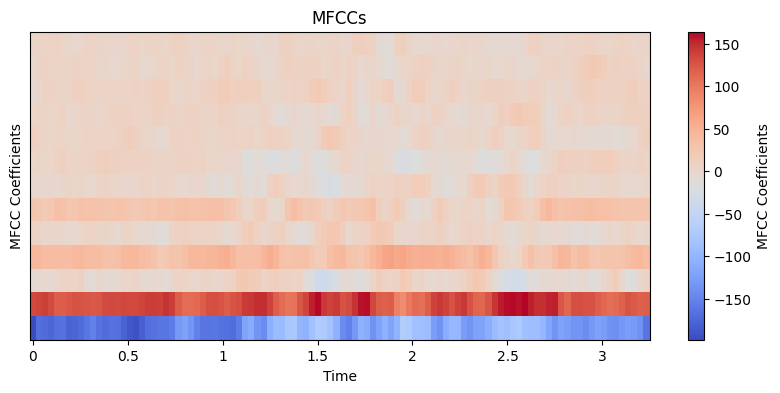

MFCC Shape: (13, 102)


In [6]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt

# Load audio file
file_path = "./archive/dev/real/B_0000_5_A.wav"  # Replace with your file path
y, sr = librosa.load(file_path, sr=None)  # Load with original sampling rate

# Extract MFCCs
mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)  # Extract 13 MFCCs

# Display MFCCs as a heatmap
plt.figure(figsize=(10, 4))
librosa.display.specshow(mfccs, x_axis="time", sr=sr)
plt.colorbar(label="MFCC Coefficients")
plt.title("MFCCs")
plt.xlabel("Time")
plt.ylabel("MFCC Coefficients")
plt.show()

# Print MFCC shape
print("MFCC Shape:", mfccs.shape)  # (13, time-frames)


In [7]:
# basically ye tera binary classification problem hai ya to fake hoga ya real hoga
def extract_features(file_path, n_mfcc=13):
    try:
        y, sr = librosa.load(file_path, sr=None)
        mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)
        return np.mean(mfccs, axis=1)  # Take mean of each MFCC coefficient
    except Exception as e:
        print(f"Error processing {file_path}: {e}")
        return None


In [15]:
import random

# Define paths for real and fake audio files
real_audio_path = "./archive/dev/real/"
fake_audio_path = "./archive/dev/fake/"

real_files = random.sample(os.listdir(real_audio_path), 50)
fake_files = random.sample(os.listdir(fake_audio_path), 50)

# Prepare dataset list
data = []
labels = []

# Process real audios
for file in real_files:
    file_path = os.path.join(real_audio_path, file)
    features = extract_features(file_path)
    if features is not None:
        data.append(features)
        labels.append(1)  # 1 for real audio

# Process fake audios
for file in fake_files:
    file_path = os.path.join(fake_audio_path, file)
    features = extract_features(file_path)
    if features is not None:
        data.append(features)
        labels.append(0)  # 0 for spoofed audio

# Convert to NumPy arrays
X = np.array(data)
y = np.array(labels)
print("Feature Shape:", X.shape, "Labels Shape:", y.shape)


Feature Shape: (100, 13) Labels Shape: (100,)


In [16]:
import os
import librosa
import numpy as np
import pandas as pd
import librosa.display
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report


In [17]:
# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Choose a classifier (Random Forest / SVM)
clf = RandomForestClassifier(n_estimators=100, random_state=42)
# clf = SVC(kernel='linear', C=1.0)  # Use SVM instead if needed

# Train the model
clf.fit(X_train, y_train)

# Predict on test set
y_pred = clf.predict(X_test)

# Evaluate model performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.85
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.88      0.82         8
           1       0.91      0.83      0.87        12

    accuracy                           0.85        20
   macro avg       0.84      0.85      0.85        20
weighted avg       0.86      0.85      0.85        20



In [20]:
def predict_audio(file_path,model):
    features = extract_features(file_path)
    if features is not None:
        features = features.reshape(1, -1)  # Reshape to match model input shape
        res= model.predict(features)[0]
        return "Real Audio" if res == 1 else "Spoofed Audio"
    return None

In [25]:
predict_audio("./archive/eval/fake/C_06334_10_A.wav",clf)

'Spoofed Audio'

In [26]:
# Water mark detection
!pip install scipy



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [35]:
import librosa
import numpy as np
import soundfile as sf

def embed_watermark(audio_path, output_path, alpha=0.01):
    # Load the original audio
    y, sr = librosa.load(audio_path, sr=None)

    # Generate a pseudo-random noise sequence as a watermark
    np.random.seed(42)  # For reproducibility
    watermark = np.random.normal(0, 1, len(y))  # White noise

    # Embed watermark
    y_watermarked = y + alpha * watermark

    # Save watermarked audio
    sf.write(output_path, y_watermarked, sr)
    print(f"Watermarked audio saved: {output_path}")


# Example usage
embed_watermark("./archive/dev/real/B_0000_5_A.wav", "./watermark/audio.wav")


Watermarked audio saved: ./watermark/audio.wav


In [39]:
import scipy.signal

def detect_watermark(audio_path):
    # Load audio
    y, sr = librosa.load(audio_path, sr=None)

    # Generate the same pseudo-random noise used in embedding
    np.random.seed(42)
    watermark = np.random.normal(0, 1, len(y))

    # Correlate the received audio with the original watermark
    correlation = np.correlate(y, watermark, mode='valid')

    # Check for a high correlation peak
    if np.max(np.abs(correlation)) > 1000:  # Threshold for detection
        print("✅ Watermark Detected: Audio is Authentic")
    else:
        print("❌ No Watermark Found: Audio Might be Fake")

# Example usage
detect_watermark("./watermark/audio.wav")


❌ No Watermark Found: Audio Might be Fake


In [40]:
!pip install audioseal

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for julius: filename=julius-0.2.7-py3-none-any.whl size=21917 sha256=ab05b07c1f8c3429b991b8e606b289d4b257598a148120615b9d84f8e0b9d97d
  Stored in directory: c:\users\mukhi\appdata\local\pip\cache\wheels\de\c1\ca\544dafe48401e8e2e17064dfe465a390fca9e8720ffa12e744
  Created wheel for antlr4-python3-runtime: filename=antlr4_python3_runtime-4.9.3-py3-none-any.whl size=144577 sha256=b41dbeb6c5a19b02e416b1cc09f53fa5d797ee70f9c739add545a7bff827a318
  Stored in directory: c:\users\mukhi\appdata\local\pip\cache\wheels\1f\be\48\13754633f1d08d1fbfc60d5e80ae1e5d7329500477685286cd
Successfully built julius antlr4-python3-runtime



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [58]:
!pip install torch torchaudio
!pip install git+https://github.com/facebookresearch/audioseal.git


  Cloning https://github.com/facebookresearch/audioseal.git to c:\users\mukhi\appdata\local\temp\pip-req-build-n_o44uws
  Resolved https://github.com/facebookresearch/audioseal.git to commit ea10f5da2bb4431a4efee9452ed35db6ffaf83cf
  Installing build dependencies: started
  Installing build dependencies: still running...
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'


  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/audioseal.git 'C:\Users\mukhi\AppData\Local\Temp\pip-req-build-n_o44uws'


In [59]:
import torch
import torchaudio
from audioseal import AudioSeal

# Load your local .wav file
wav_file = "./archive/dev/real/B_0001_20_C.wav"  # Replace with your file path
wav, sr = torchaudio.load(wav_file)

# Ensure the sample rate is 16kHz (required for AudioSeal)
if sr != 16000:
    wav = torchaudio.transforms.Resample(orig_freq=sr, new_freq=16000)(wav)
    sr = 16000

# Move to the correct device (CPU or GPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
wav = wav.to(device)


OSError: [WinError 127] The specified procedure could not be found

In [50]:

from audioseal import AudioSeal

# model name corresponds to the YAML card file name found in audioseal/cards
model = AudioSeal.load_generator("audioseal_wm_16bits")

# Other way is to load directly from the checkpoint
# model =  Watermarker.from_pretrained(checkpoint_path, device = wav.device)

# a torch tensor of shape (batch, channels, samples) and a sample rate
# It is important to process the audio to the same sample rate as the model
# expects. In our case, we support 16khz audio 
wav, sr = ..., 16000

watermark = model.get_watermark(wav, sr)

# Optional: you can add a 16-bit message to embed in the watermark
# msg = torch.randint(0, 2, (wav.shape(0), model.msg_processor.nbits), device=wav.device)
# watermark = model.get_watermark(wav, message = msg)

watermarked_audio = wav + watermark

detector = AudioSeal.load_detector("audioseal_detector_16bits")

# To detect the messages in the high-level.
result, message = detector.detect_watermark(watermarked_audio, sr)

print(result) # result is a float number indicating the probability of the audio being watermarked,
print(message)  # message is a binary vector of 16 bits


# To detect the messages in the low-level.
result, message = detector(watermarked_audio, sr)

# result is a tensor of size batch x 2 x frames, indicating the probability (positive and negative) of watermarking for each frame
# A watermarked audio should have result[:, 1, :] > 0.5
print(result[:, 1 , :])  

# Message is a tensor of size batch x 16, indicating of the probability of each bit to be 1.
# message will be a random tensor if the detector detects no watermarking from the audio
print(message)  

Downloading: "https://huggingface.co/facebook/audioseal/resolve/main/generator_base.pth" to C:\Users\mukhi\.cache\audioseal\0f195d476dd87ca1bd7b09e6
100%|██████████| 56.1M/56.1M [01:16<00:00, 769kB/s] 


AttributeError: 'ellipsis' object has no attribute 'size'

In [43]:
!pip install torchaudio

   ---------------------------------------- 0.0/2.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.4 MB ? eta -:--:--
   ---- ----------------------------------- 0.3/2.4 MB ? eta -:--:--
   ---- ----------------------------------- 0.3/2.4 MB ? eta -:--:--
   -------- ------------------------------- 0.5/2.4 MB 799.2 kB/s eta 0:00:03
   -------- ------------------------------- 0.5/2.4 MB 799.2 kB/s eta 0:00:03
   ----------------- ---------------------- 1.0/2.4 MB 1.0 MB/s eta 0:00:02
   --------------------- ------------------ 1.3/2.4 MB 1.1 MB/s eta 0:00:02
   ------------------------- -------------- 1.6/2.4 MB 1.1 MB/s eta 0:00:01
   ---------------------------------- ----- 2.1/2.4 MB 1.2 MB/s eta 0:00:01
   ---------------------------------- ----- 2.1/2.4 MB 1.2 MB/s eta 0:00:01
   ---------------------------------------- 2.4/2.4 MB 1.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/204.1 MB ? eta -:--:--
   --------------------------------------

  You can safely remove it manually.

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [46]:
! python.exe -m pip install --upgrade pip

   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   -------------------------------

In [48]:
!Pytorch --version

'Pytorch' is not recognized as an internal or external command,
operable program or batch file.


In [60]:
!pip install audioseal

In [42]:
from audioseal import AudioSeal

In [43]:
model = AudioSeal.load_generator("audioseal_wm_16bits")

In [44]:
import librosa
import torch

# Load audio file
wav, sr = librosa.load("./archive/dev/fake/B_10000_20_C.wav", sr=16000)

# Convert wav to a PyTorch tensor and add batch + channel dimensions
wav_tensor = torch.tensor(wav, dtype=torch.float32).unsqueeze(0).unsqueeze(0)  # Shape: (1, 1, T)

# Pass the tensor to the model
watermark = model.get_watermark(wav_tensor, sr)


In [45]:
import numpy as np

# Convert watermark to NumPy
watermark_np = watermark.squeeze().detach().cpu().numpy()  # Remove extra dimensions & move to CPU

# Ensure both arrays have the same shape
if watermark_np.shape != wav.shape:
    watermark_np = np.resize(watermark_np, wav.shape)  # Resize watermark if needed

# Add the watermark to the original audio
watermarked_audio = wav + watermark_np


In [46]:
watermarked_audio.shape

(49440,)

In [47]:
detector = AudioSeal.load_detector("audioseal_detector_16bits")

In [48]:
watermarked_audio_tensor = torch.tensor(watermarked_audio, dtype=torch.float32).unsqueeze(0).unsqueeze(0)  
# Shape: (1, 1, T) → (Batch, Channel, Time)

# Detect watermark
result, message = detector.detect_watermark(watermarked_audio_tensor, sr)

# Print results
print("Watermark Probability:", result)  # Probability of watermark presence
print("Extracted Watermark Message:", message)  # Extracted binary message (16 bits)

Watermark Probability: 1.0
Extracted Watermark Message: tensor([[1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0]], dtype=torch.int32)


In [49]:
# audio_tensor = torch.tensor(wav_tensor, dtype=torch.float32).unsqueeze(0).unsqueeze(0)  
# Shape: (1, 1, T) → (Batch, Channel, Time)

# Detect watermark=>i am passing normal audio
result, message = detector.detect_watermark(wav_tensor, sr)

# Print results
print("Watermark Probability:", result)  # Probability of watermark presence
print("Extracted Watermark Message:", message)  # Extracted binary message (16 bits)

Watermark Probability: 0.0
Extracted Watermark Message: tensor([[0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0]], dtype=torch.int32)


In [40]:
print(wav_tensor.shape)  


torch.Size([1, 1, 49440])


In [39]:
watermarked_audio_tensor.shape

torch.Size([1, 1, 49440])